In [193]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/Grouped_QB.csv')  # Replace with your actual data
df = df[df["Year"] > 2017 && df['Year'] < 2023]
metric = 'Current_PFF'  # Specify the metric you want to predict

In [195]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [196]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [197]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [198]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x31b78bf50>>


In [199]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_twp_rate', 'Value_cap_space', 'Previous_AV', 'Previous_PFF', 
                                           'Previous_ypa', 'Previous_qb_rating', 'Previous_grades_pass', 
                                           'Previous_accuracy_percent', 'Previous_btt_rate']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [200]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[  3.14234375  11.43995749  11.          64.33140625   7.97234375
    87.7428125   65.1784375   74.32578125   2.13875   ]
  [  3.4          0.61049445  15.          77.9          8.4
   102.          75.7         78.8          2.6       ]
  [  4.5137558   17.8630137   11.          61.55811437   7.5927357
    90.24605873  60.39690881  75.82952087   3.00850077]]

 [[  3.80300158   7.39638682  15.          62.19810427   7.31090047
    94.68720379  58.16319115  72.39494471   4.11879937]
  [  3.44566474   8.06760848   9.          64.65390173   6.17991329
    84.07037572  64.42196532  71.81921965   3.93973988]
  [  4.44748201   6.39452055  10.          64.11294964   6.37266187
    86.73453237  62.75971223  72.42374101   4.23309353]]

 [[  3.66574501   9.24017003  11.          71.89754224   6.5546851
    87.06513057  69.64009217  72.4          5.11213518]
  [  4.6108484    0.61049445   8.          60.80876217   6.41641168
    75.65215577  60.30166898  68.67232267   2.71043115]
  [  3.536950

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [202]:
# Define the input layer
inputs = Input(shape=(3, 9))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [203]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [204]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 4870.5278 - val_loss: 5260.4375
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5065.7373 - val_loss: 5213.8267
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4883.0005 - val_loss: 5156.6060
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4818.4214 - val_loss: 5098.5161
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4896.3257 - val_loss: 5026.3115
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4643.4751 - val_loss: 4943.3628
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4879.9268 - val_loss: 4839.1528
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4546.6196 - val_loss: 4689.8003
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4556.0869 - val_loss: 4506.7417
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4310.5322 - val_loss: 4277.6597
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4054.1223 - val_loss: 3996.2632
Epoch 12/80
4/4 ━━━━━━━━━━

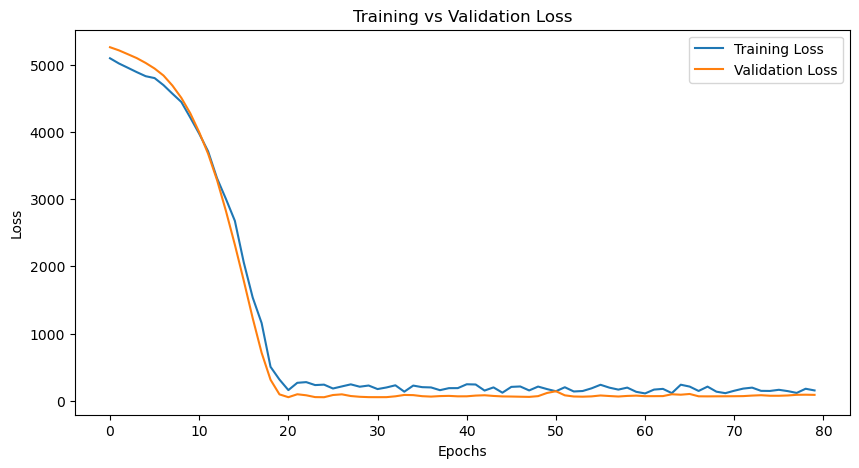

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


R² Score: 0.2566
Saved new best model with R² = 0.2566


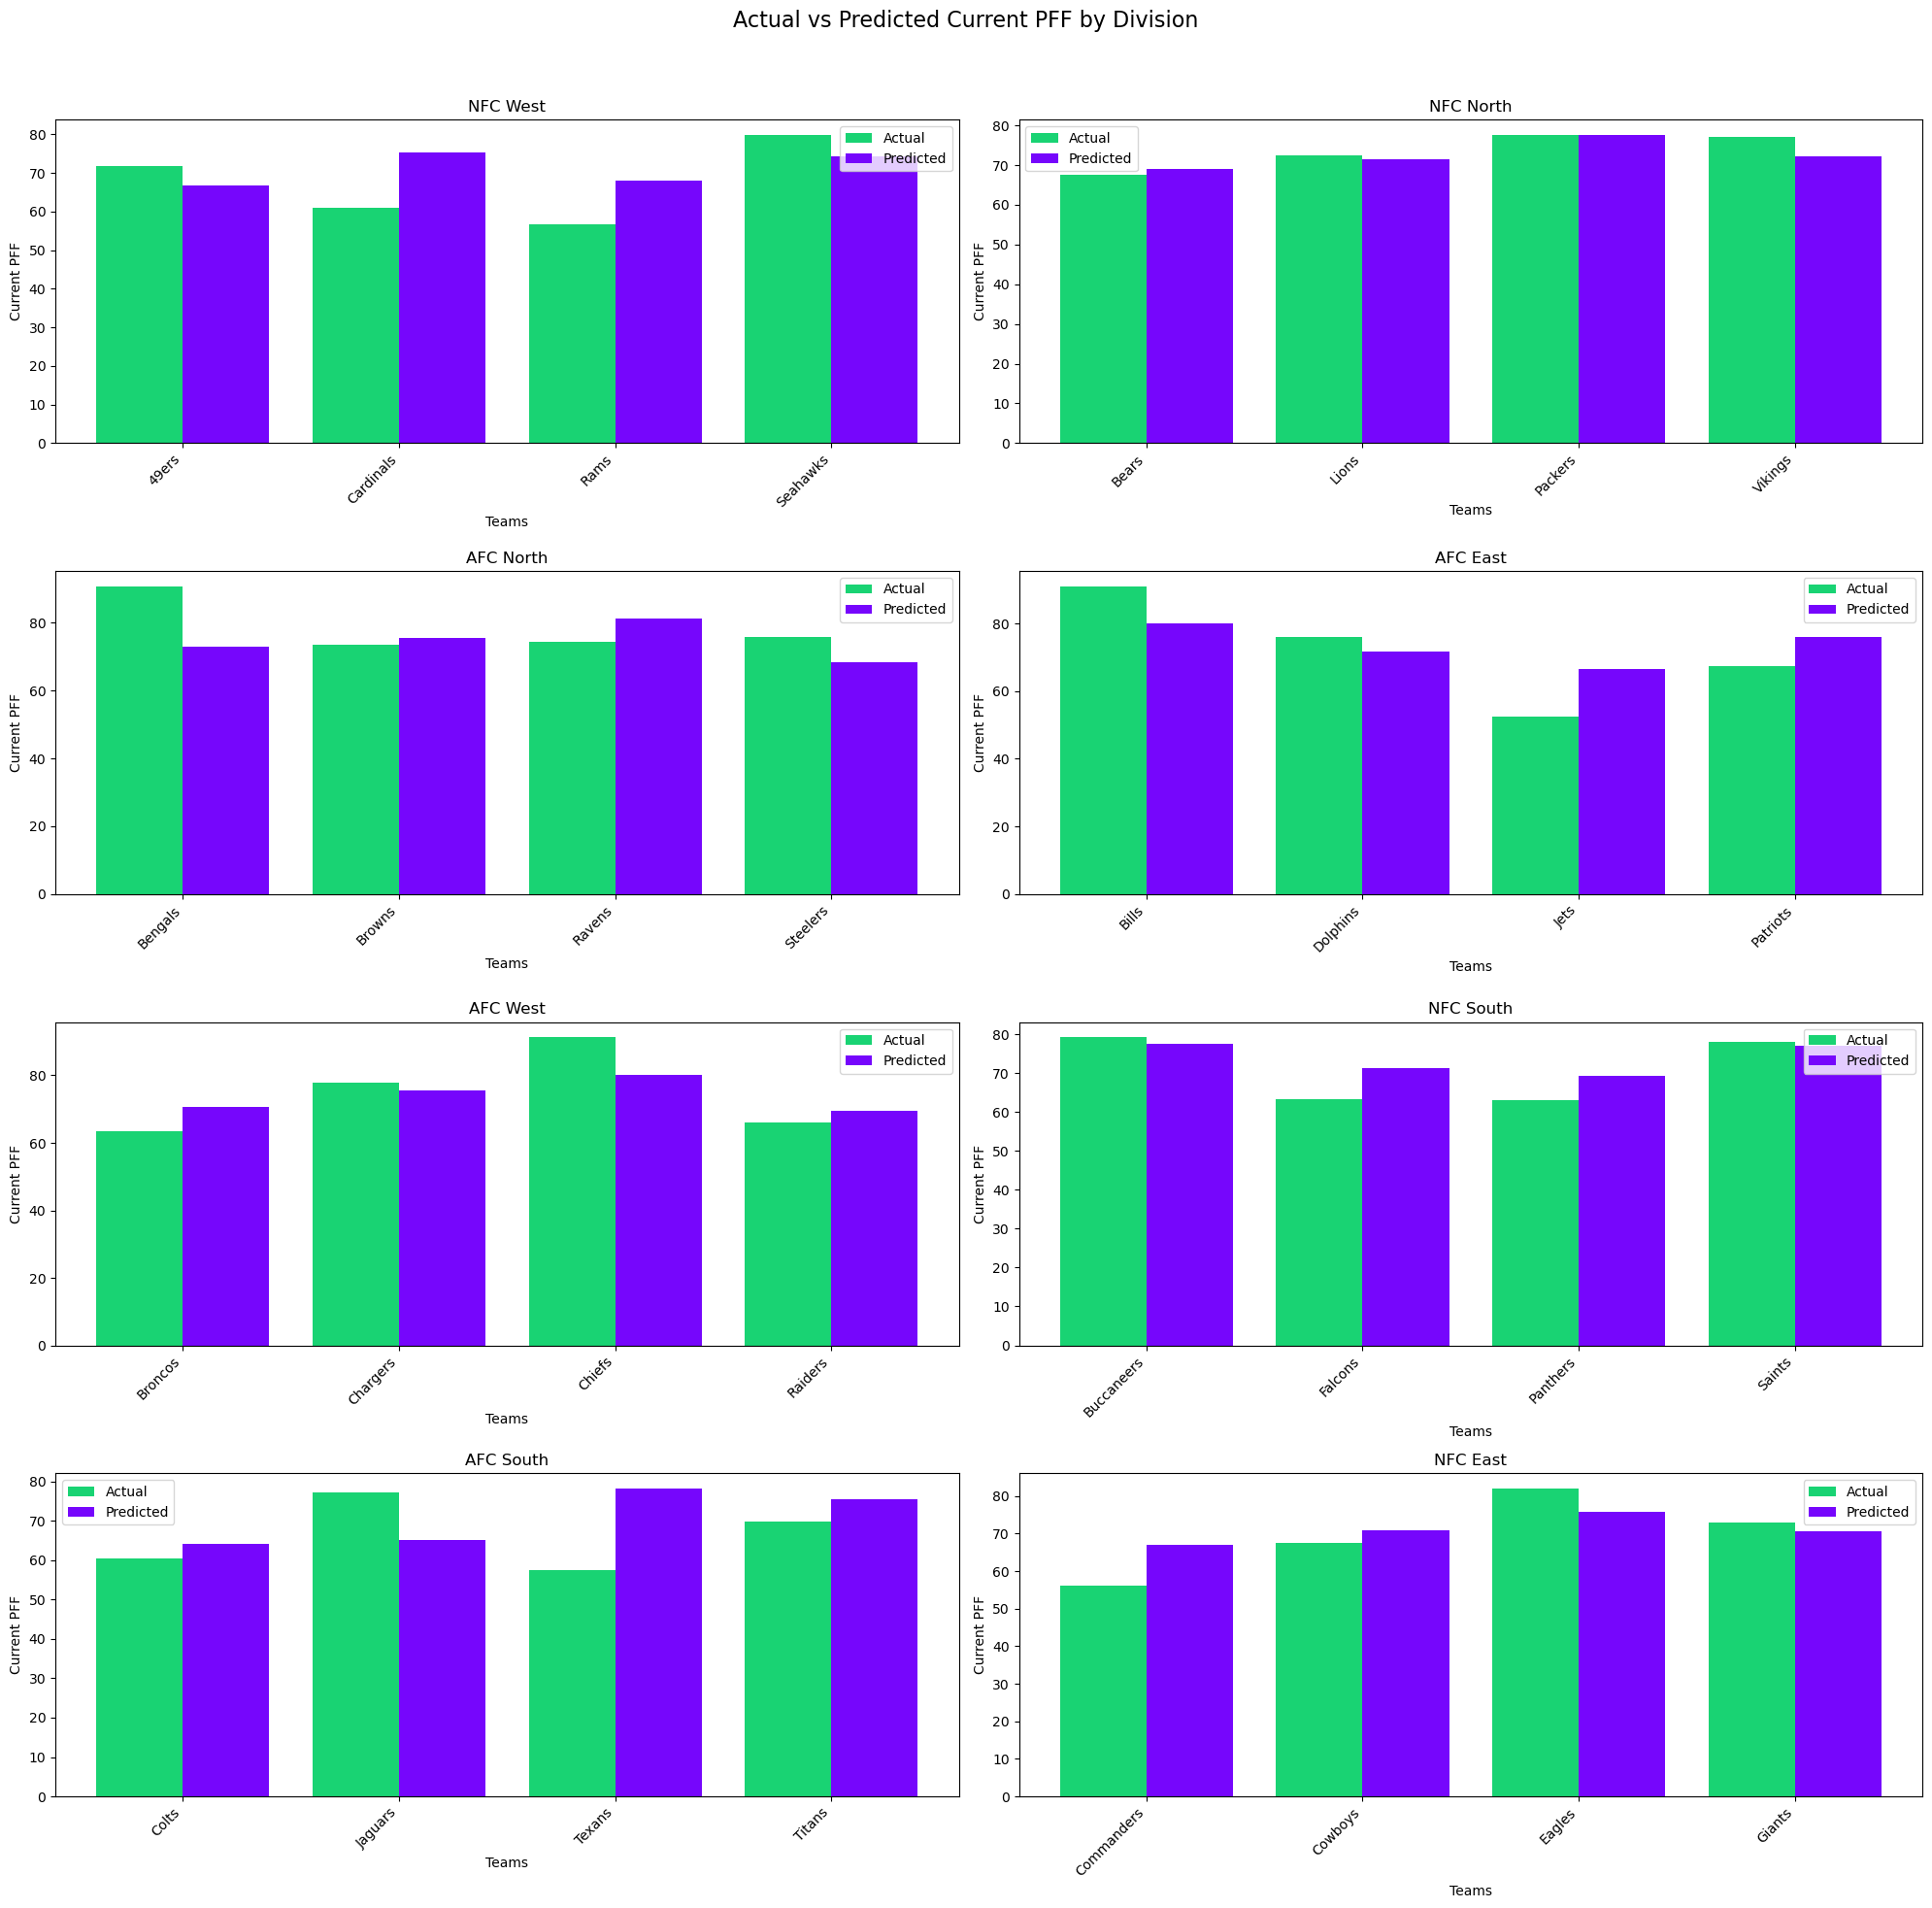

Best 0.2565674457488909
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 130.4586 - val_loss: 88.8900
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 128.1538 - val_loss: 91.4765
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 169.0972 - val_loss: 94.7596
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.0322 - val_loss: 98.2955
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 135.2964 - val_loss: 97.3082
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.4397 - val_loss: 97.5552
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 121.7424 - val_loss: 99.7988
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131.2190 - val_loss: 111.6569
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 154.3720 - val_loss: 110.4796
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 214.2240 - val_loss: 106.5179
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 168.4059 - val_loss: 138.7702
Epoch 12/100
4/4 ━━━━━━━

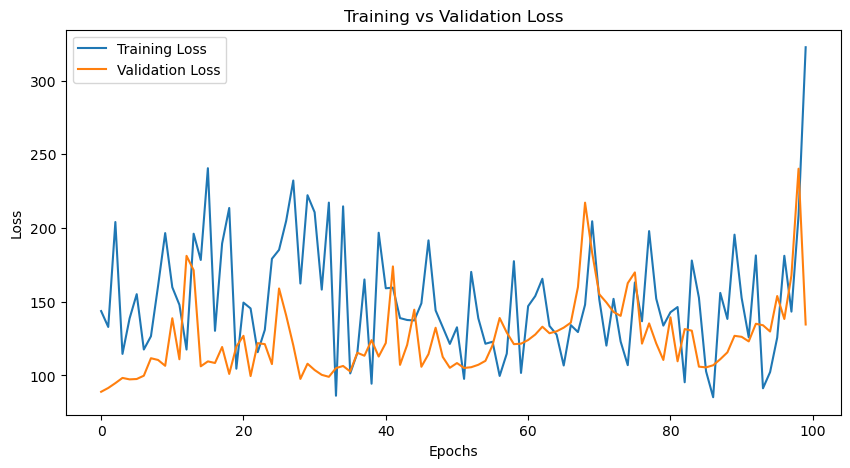

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R² Score: 0.0650


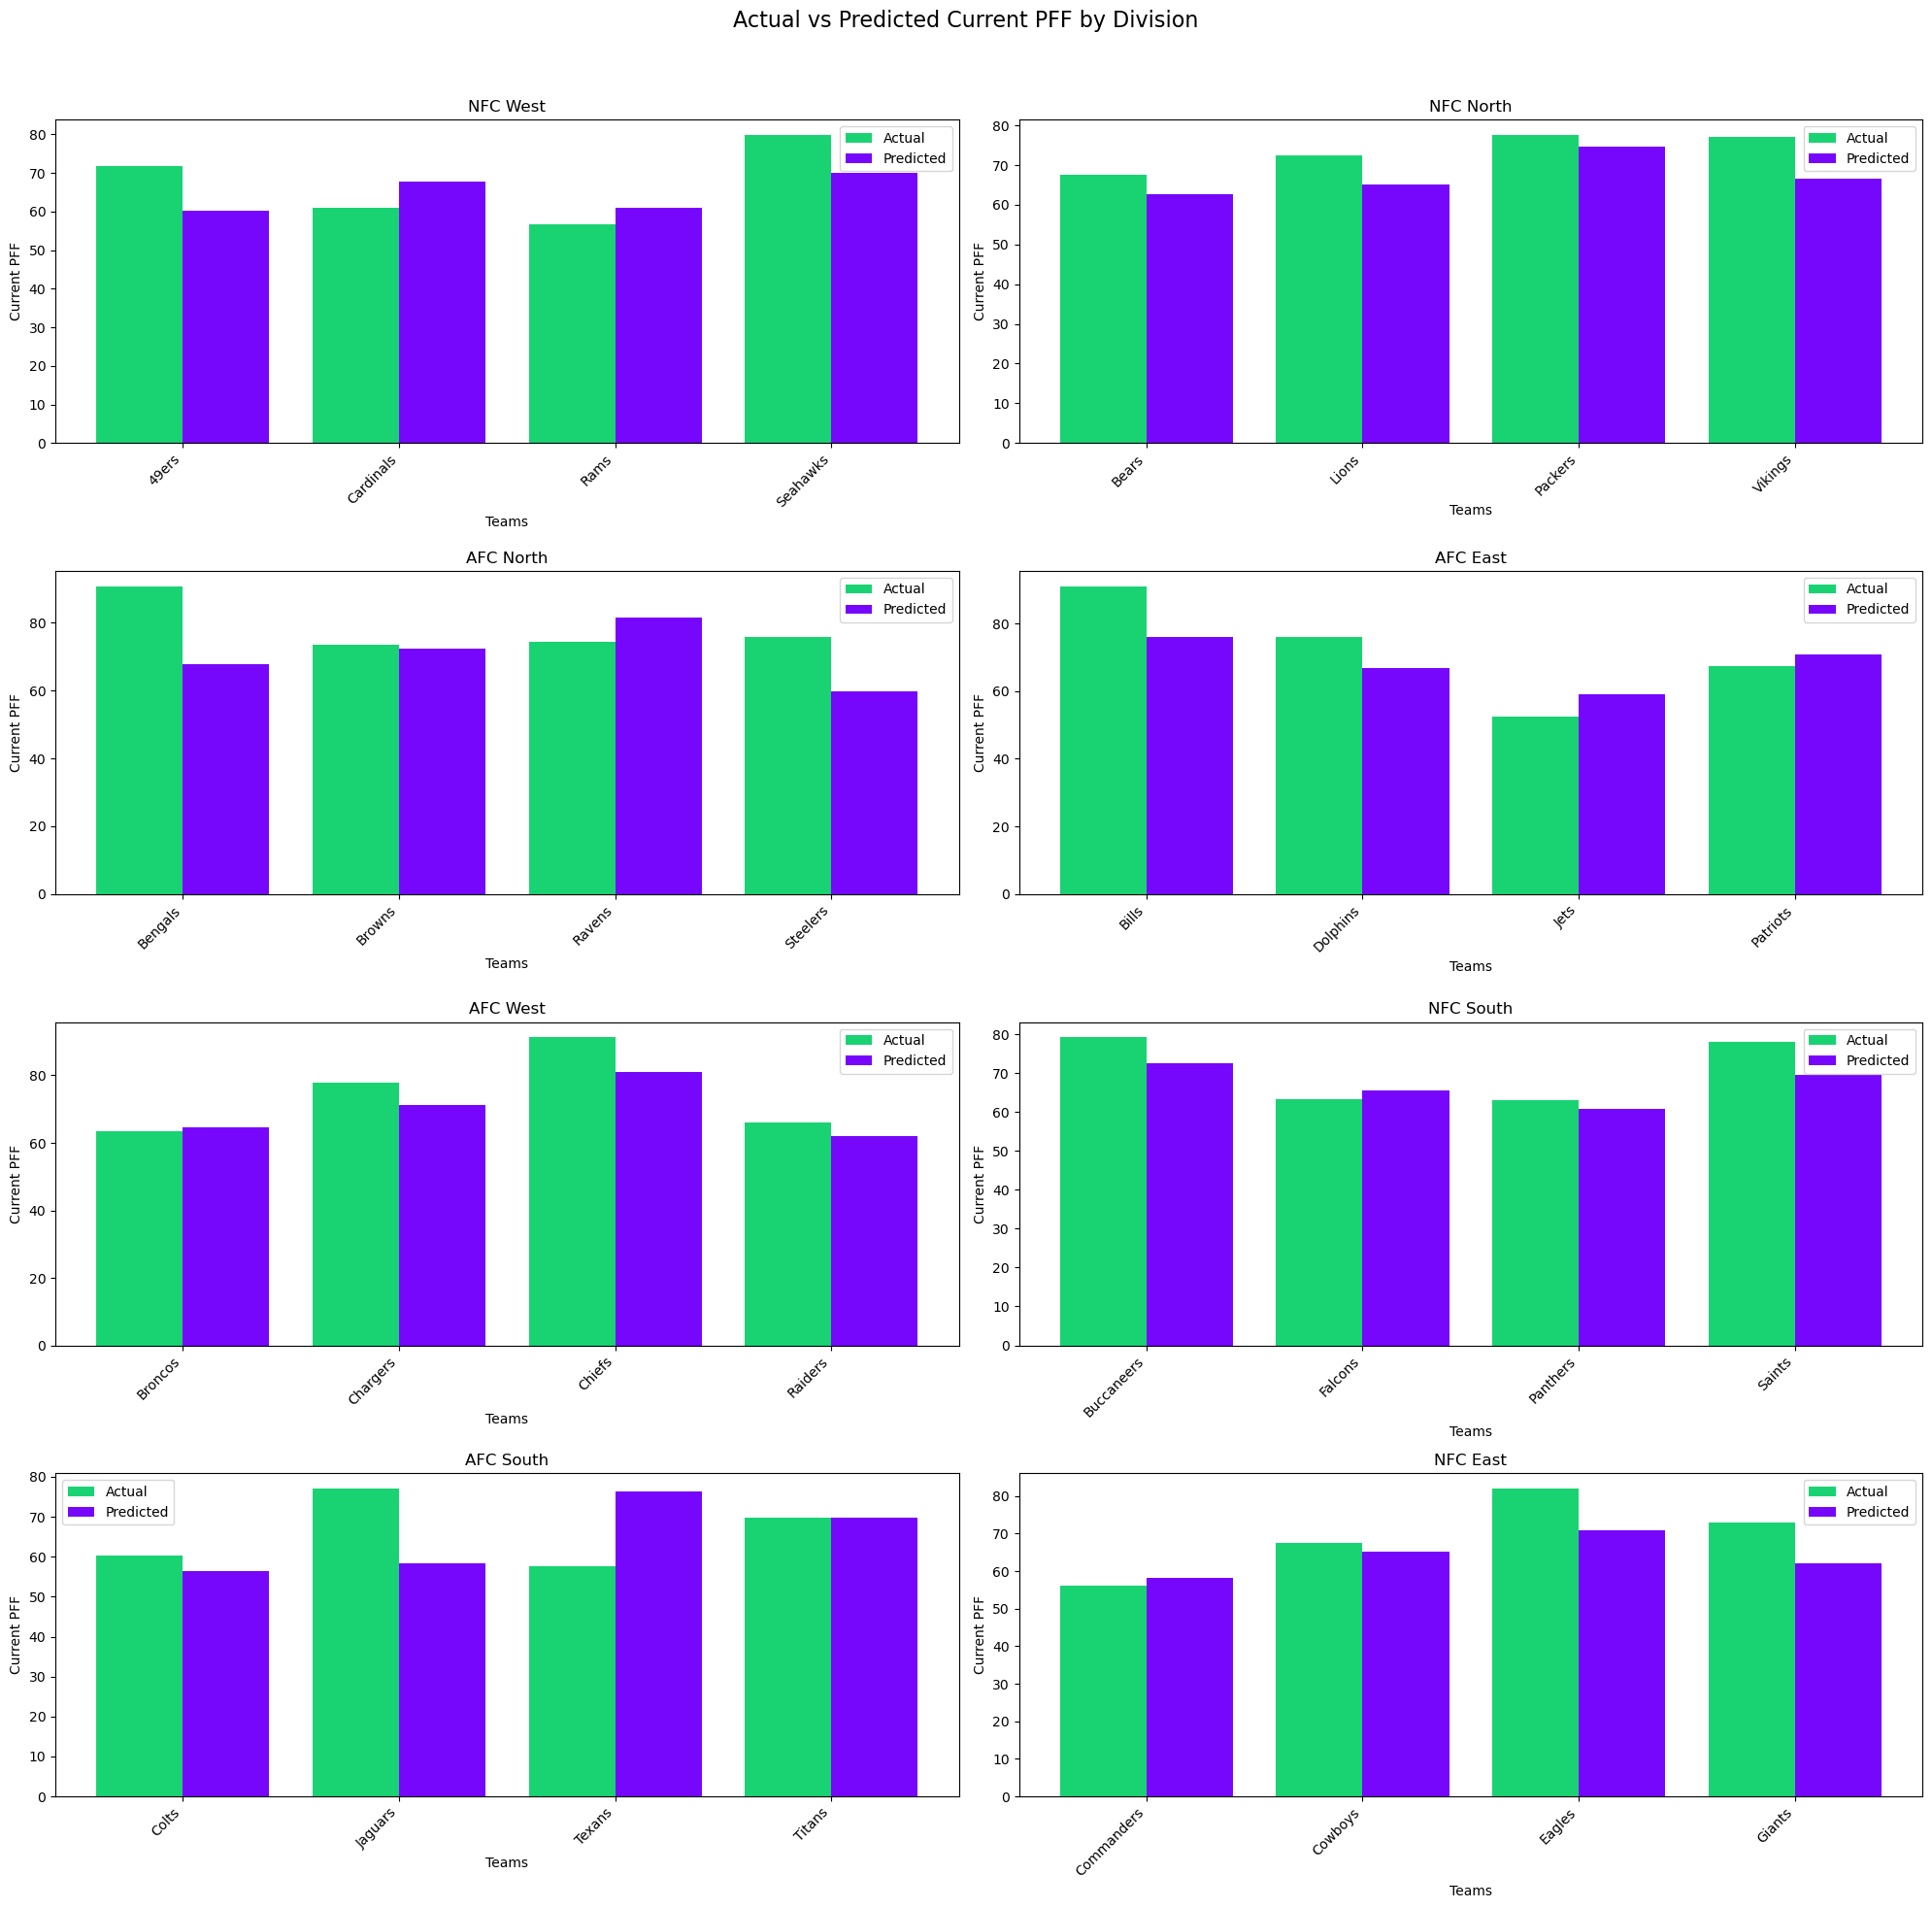

Best 0.2565674457488909
Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 105.1516 - val_loss: 201.1888
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 233.1321 - val_loss: 267.0042
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 272.9105 - val_loss: 152.6876
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 223.9635 - val_loss: 143.1985
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 199.1389 - val_loss: 183.5127
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 242.4732 - val_loss: 140.0545
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 122.3018 - val_loss: 111.5012
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250.9675 - val_loss: 115.6590
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134.1469 - val_loss: 109.8120
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.4957 - val_loss: 124.5364
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149.5193 - val_loss: 135.7345
Epoch 12/150
4/4 

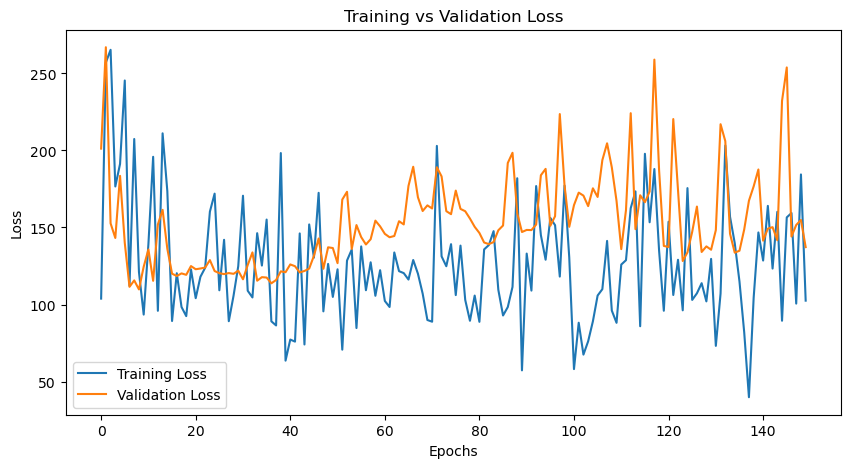

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R² Score: 0.1977


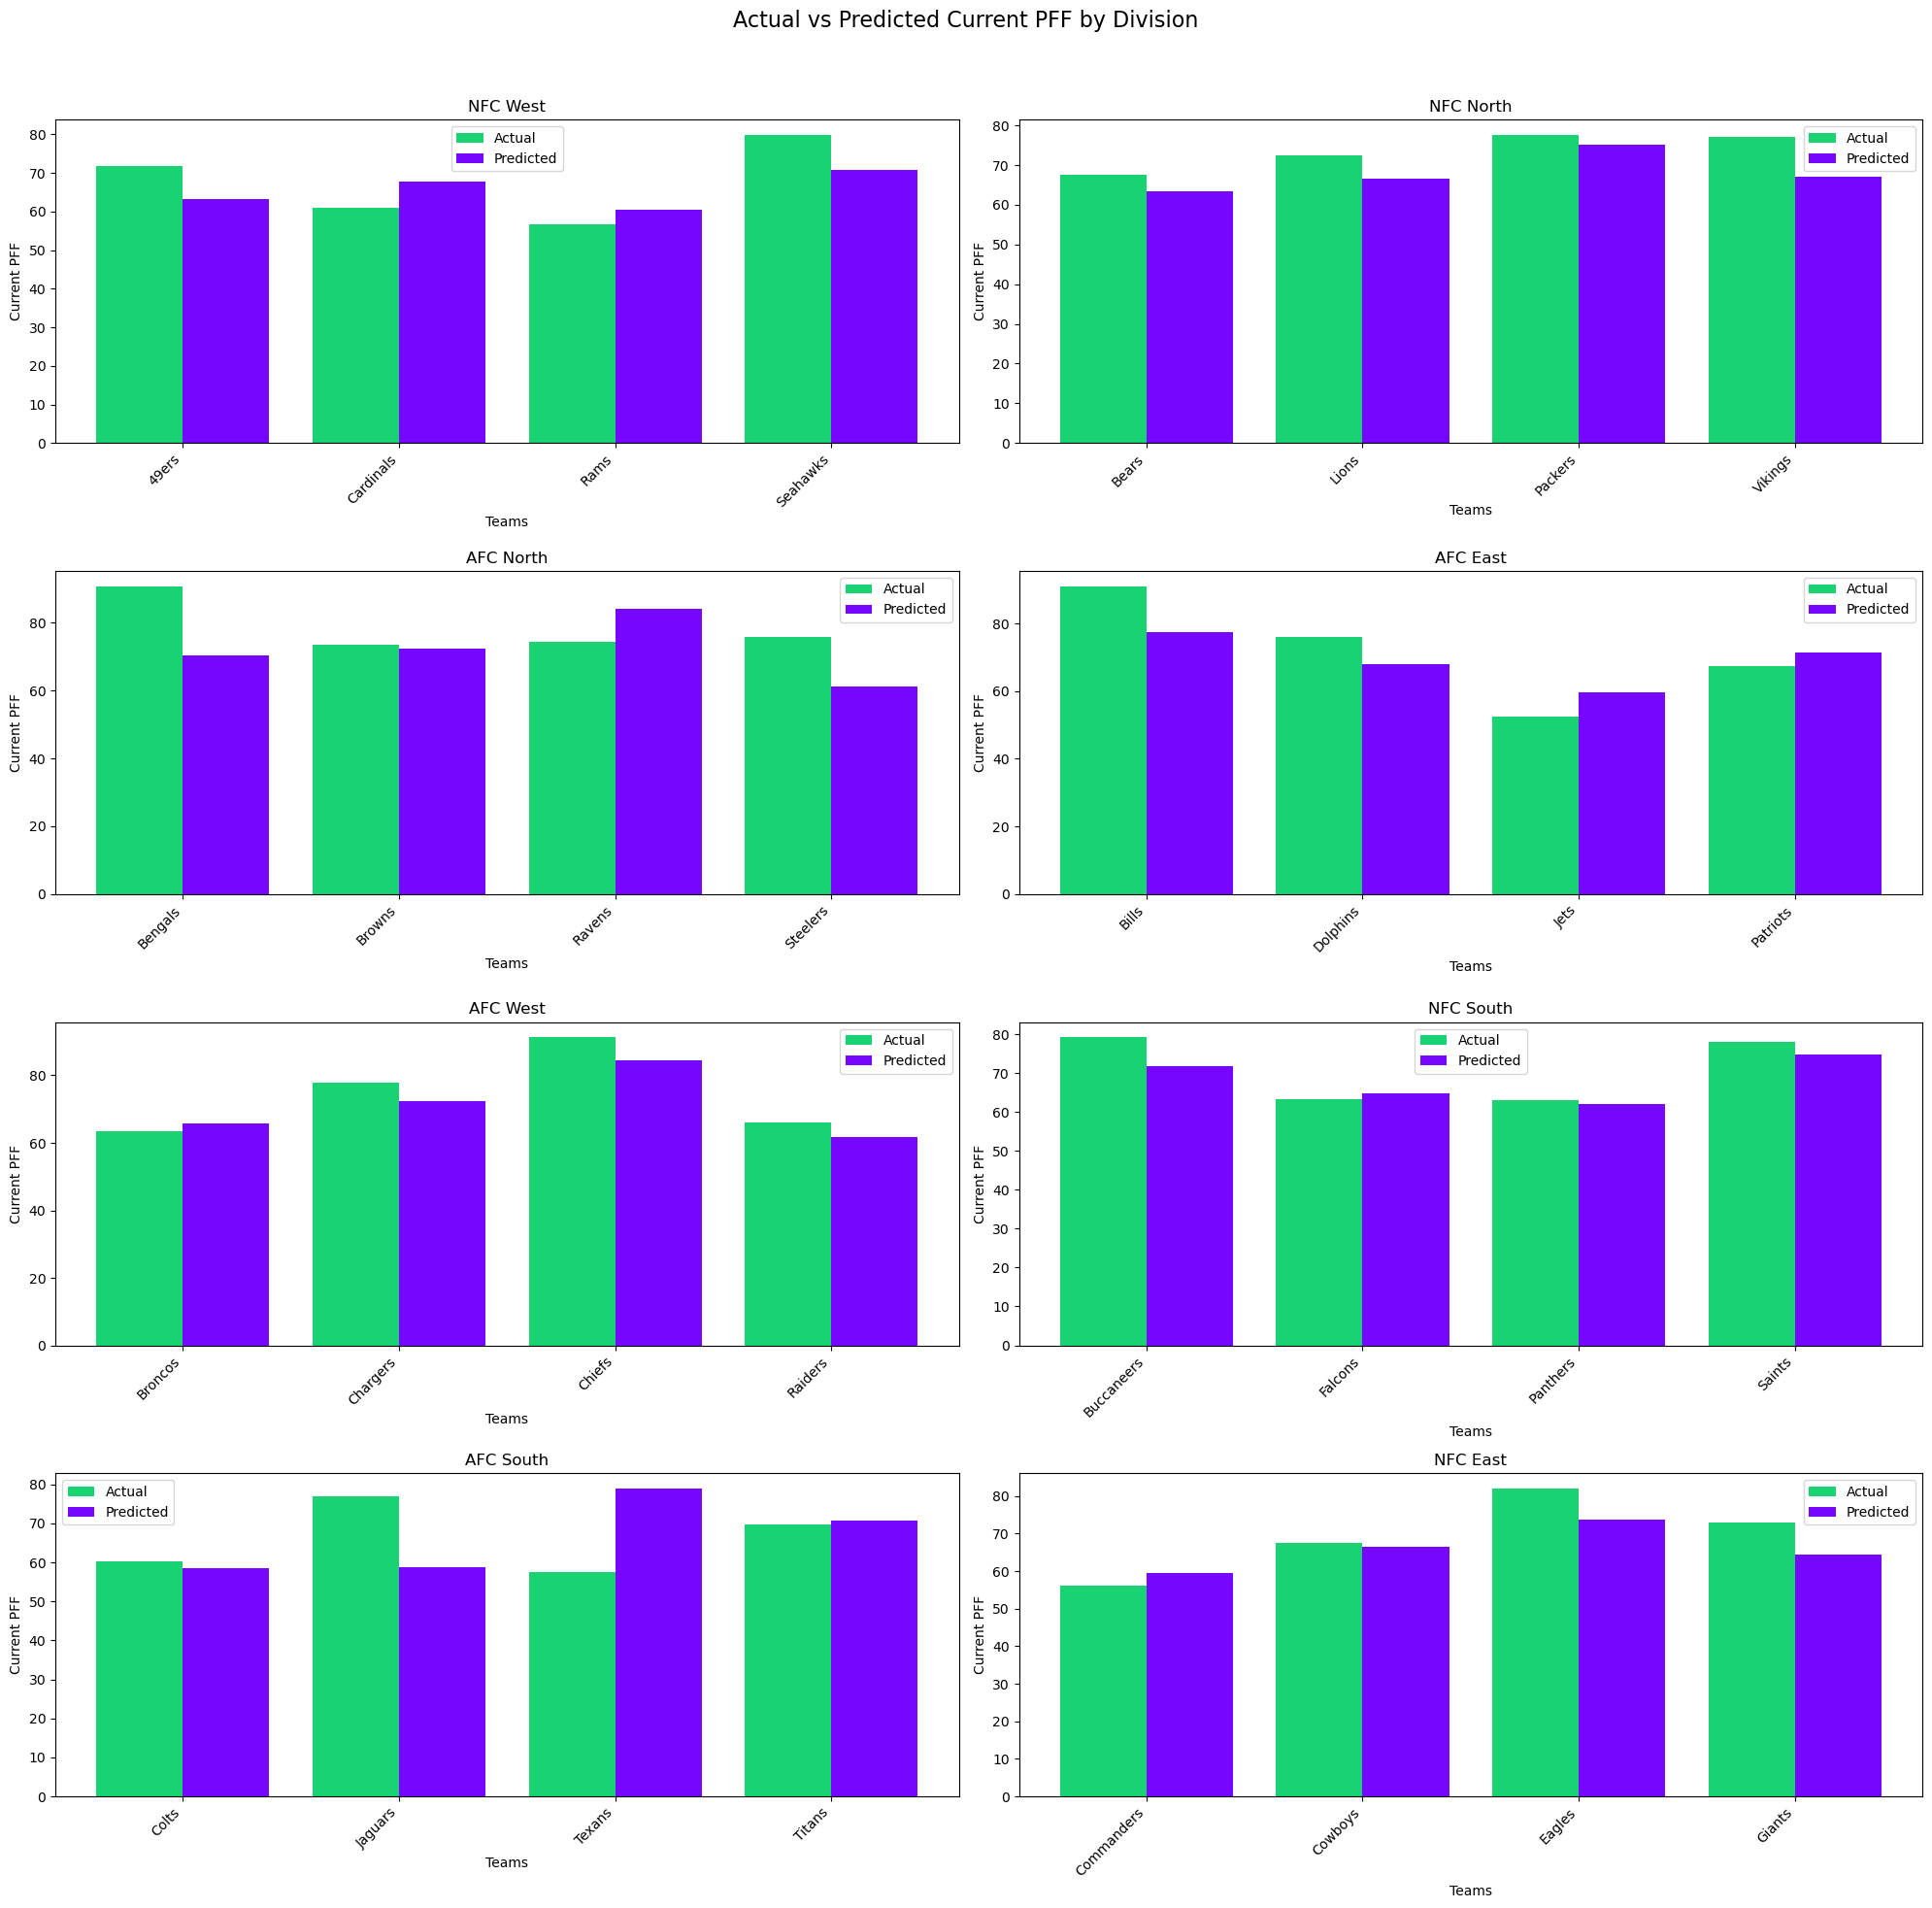

Best 0.2565674457488909
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 98.1373 - val_loss: 151.7327
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.9616 - val_loss: 177.8231
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 177.7757 - val_loss: 149.7154
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.7779 - val_loss: 138.0245
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.7224 - val_loss: 139.3107
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 188.7344 - val_loss: 142.0114
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.7487 - val_loss: 144.5023
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 255.2391 - val_loss: 161.3673
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 193.0862 - val_loss: 165.0512
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102.6204 - val_loss: 186.5546
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.4590 - val_loss: 203.9831
Epoch 12/200
4/4 ━━━━━

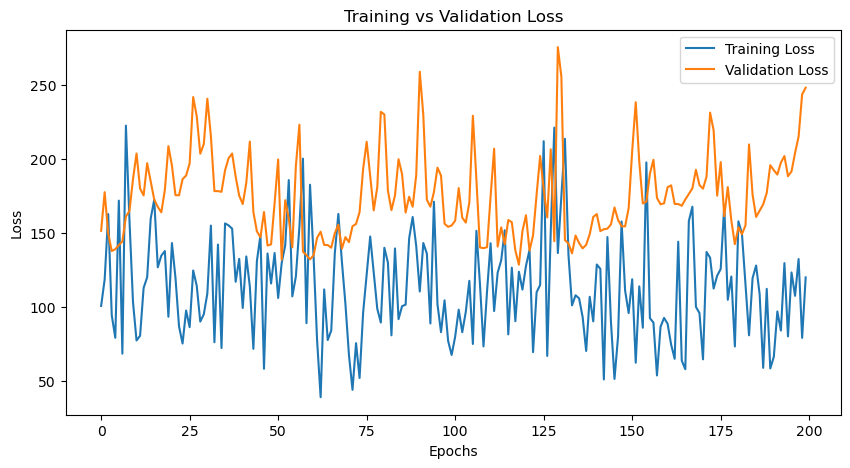

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
R² Score: 0.1502


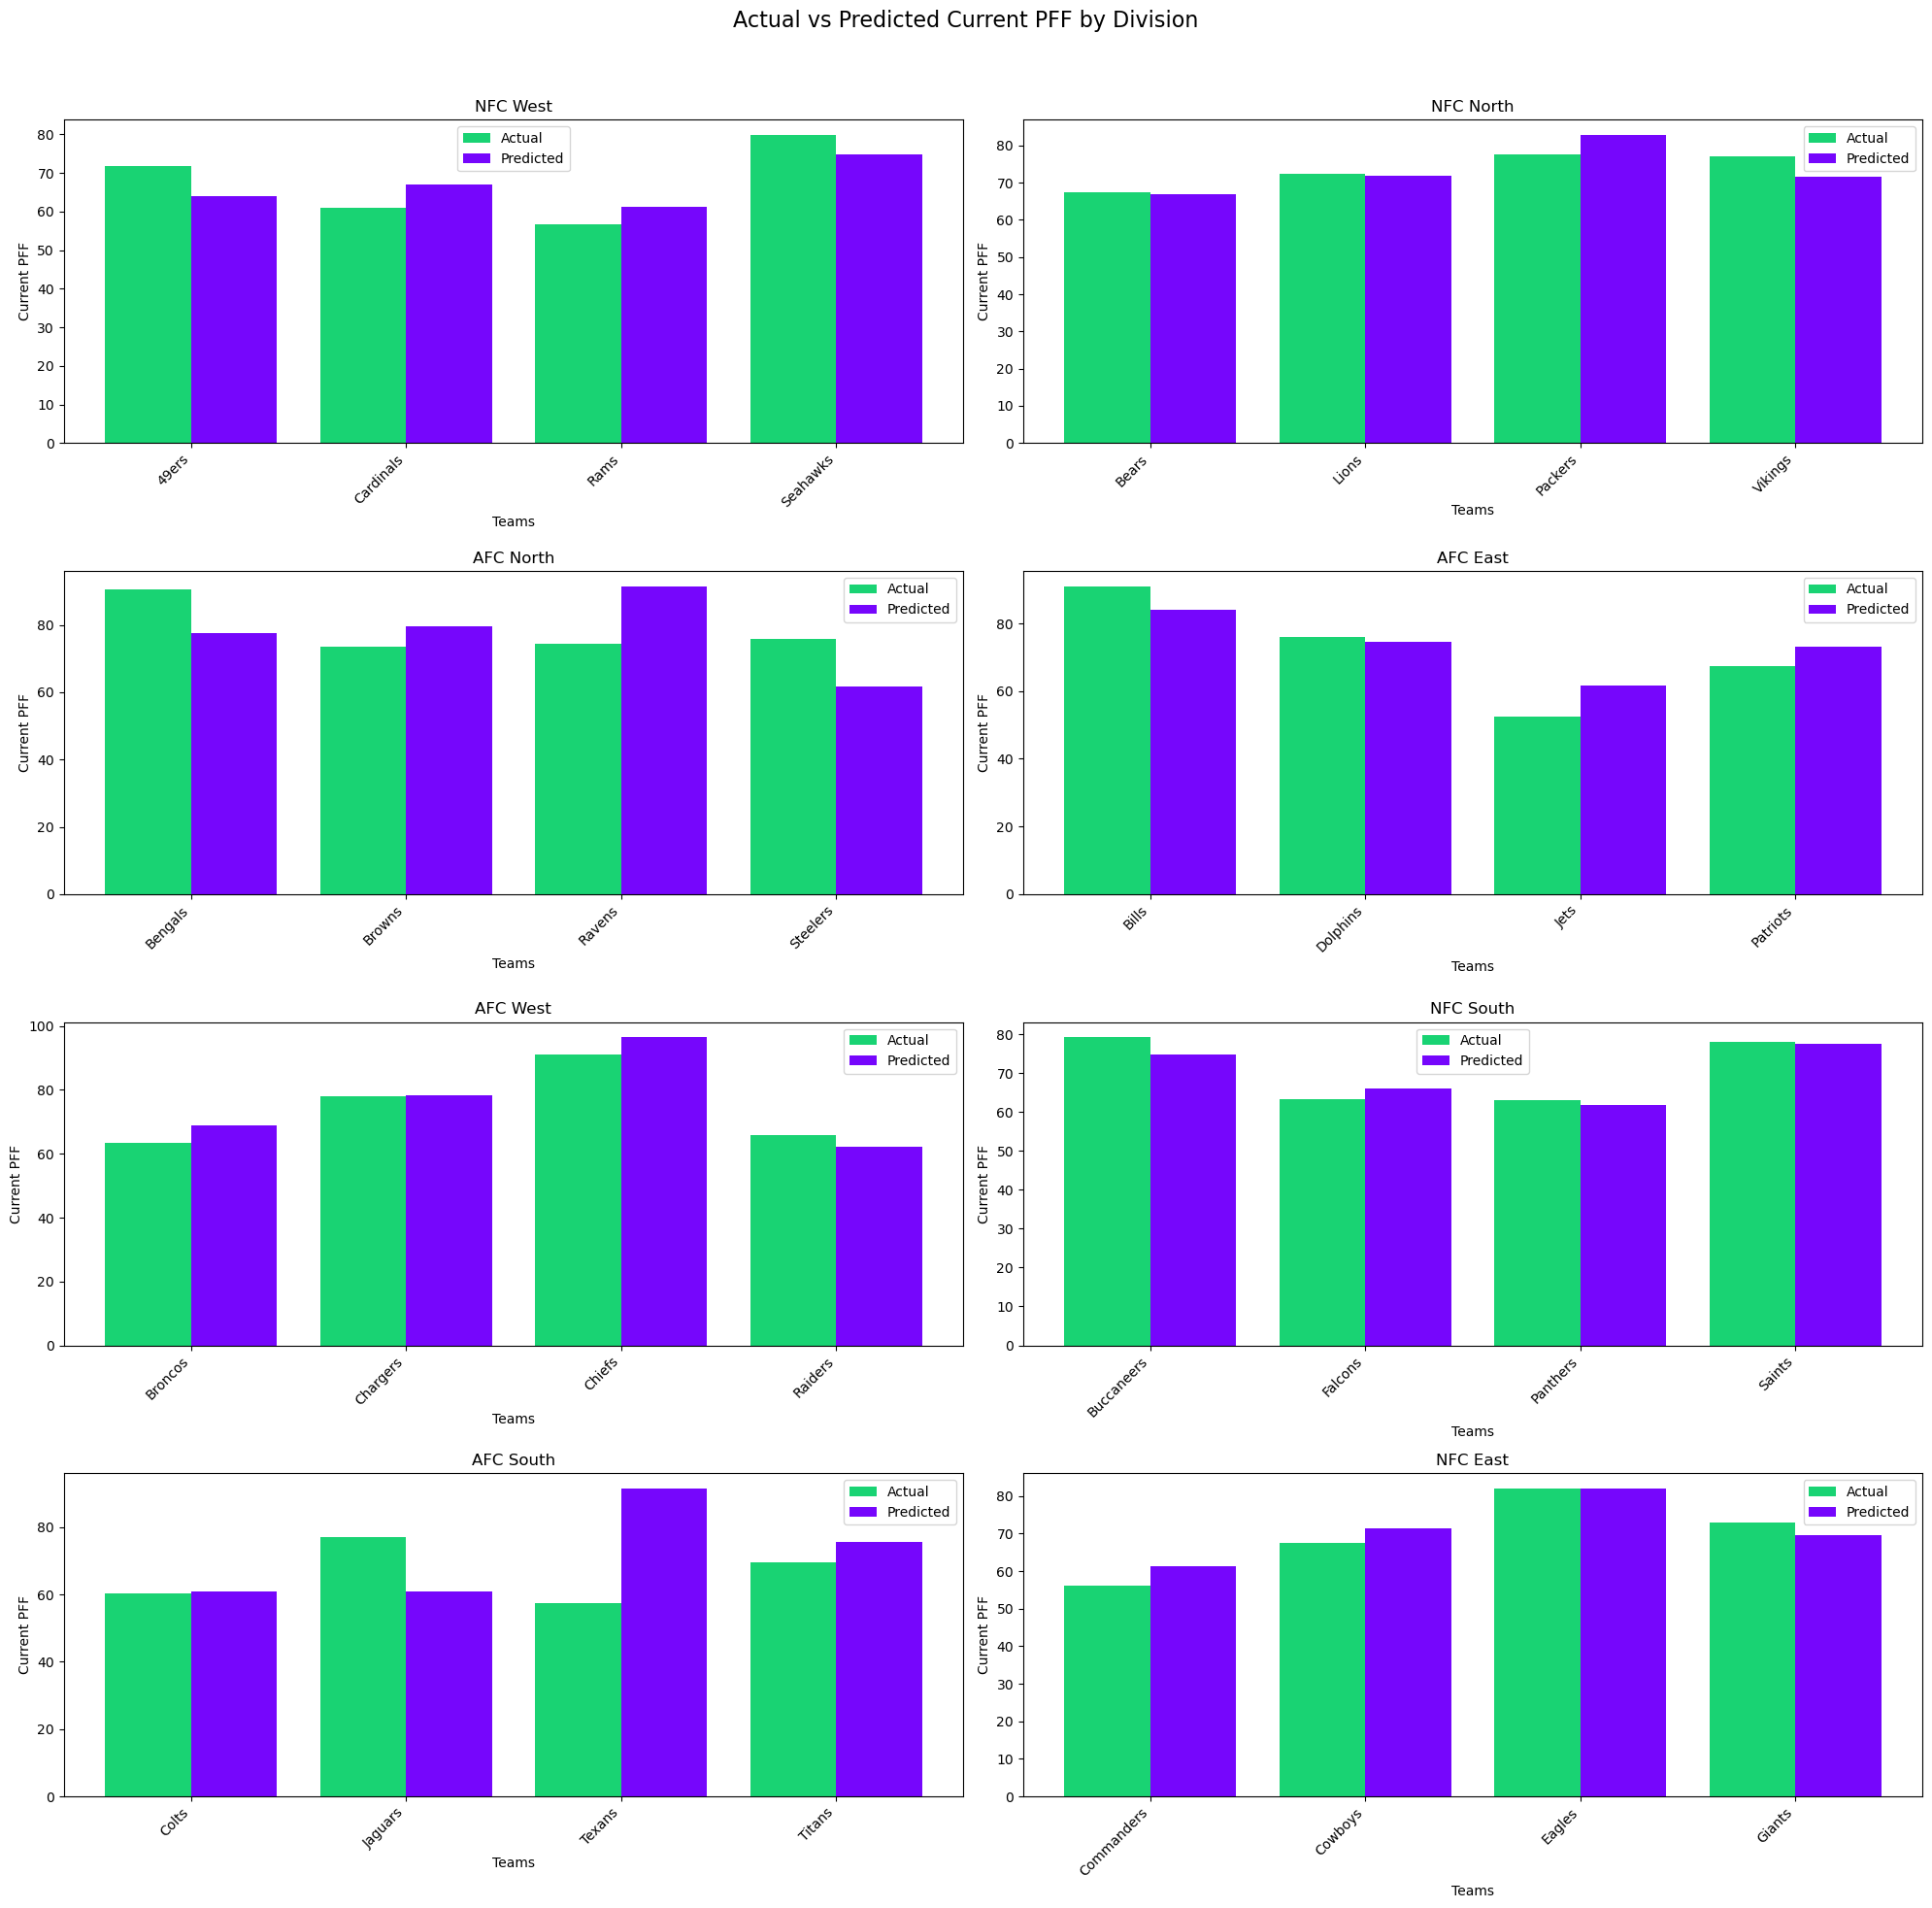

Best 0.2565674457488909
Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 73.8066 - val_loss: 239.7979
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.2049 - val_loss: 251.6533
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 106.3137 - val_loss: 256.7604
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66.1251 - val_loss: 257.3892
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.0415 - val_loss: 237.8421
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 104.2383 - val_loss: 236.5723
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102.7995 - val_loss: 231.2264
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137.0884 - val_loss: 250.5357
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.4470 - val_loss: 282.5830
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.5330 - val_loss: 281.1862
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.9831 - val_loss: 254.0038
Epoch 12/250
4/4 ━━━━━━

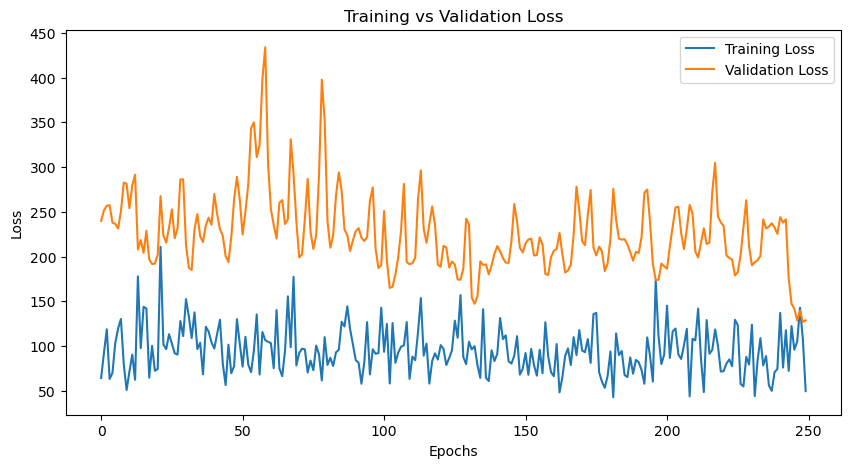

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R² Score: 0.2517


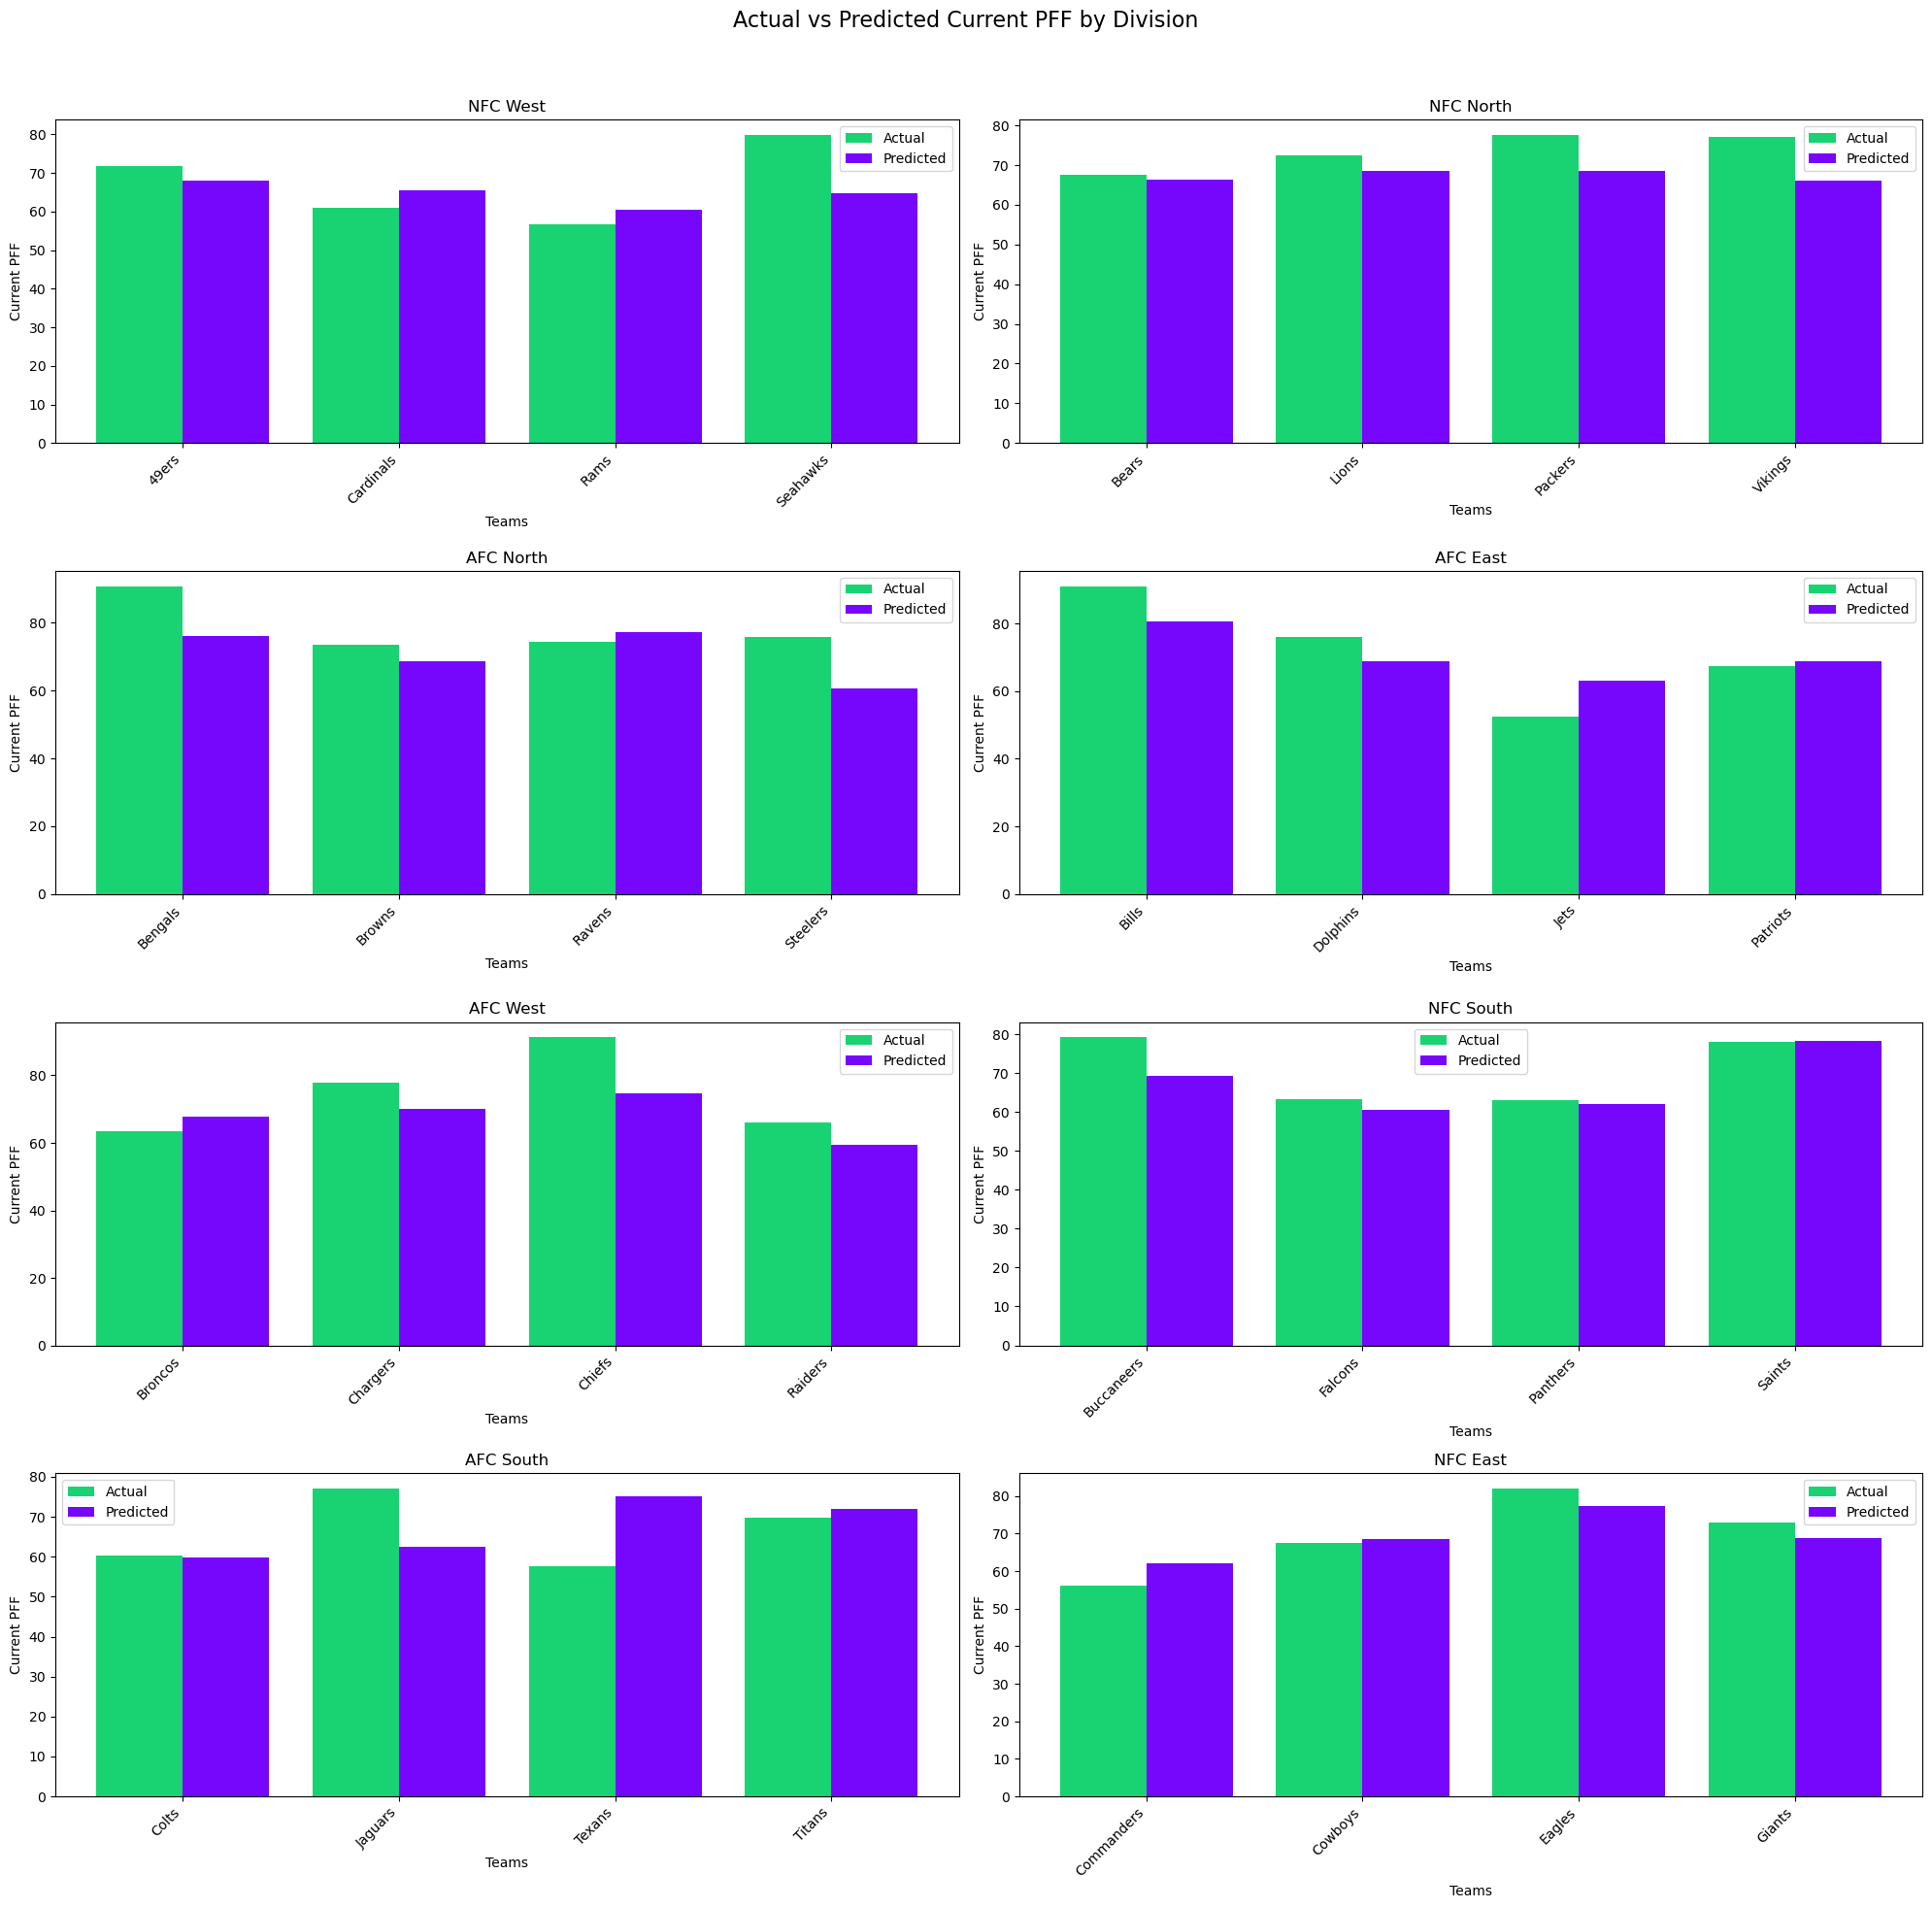

Best 0.2565674457488909
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 181.8715 - val_loss: 149.4595
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 136.2868 - val_loss: 147.9012
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.1679 - val_loss: 156.5549
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.8275 - val_loss: 169.3757
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.3757 - val_loss: 182.2902
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.5306 - val_loss: 194.5236
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124.2427 - val_loss: 204.1049
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.3551 - val_loss: 212.4256
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.8764 - val_loss: 218.1357
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134.7069 - val_loss: 272.2787
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.8703 - val_loss: 318.4333
Epoch 12/500
4/4 ━━━━━

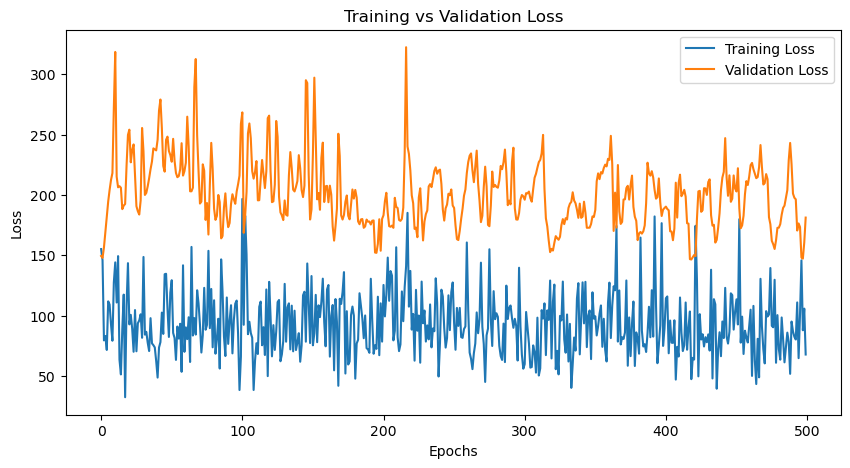

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.4039


Saved new best model with R² = 0.4039


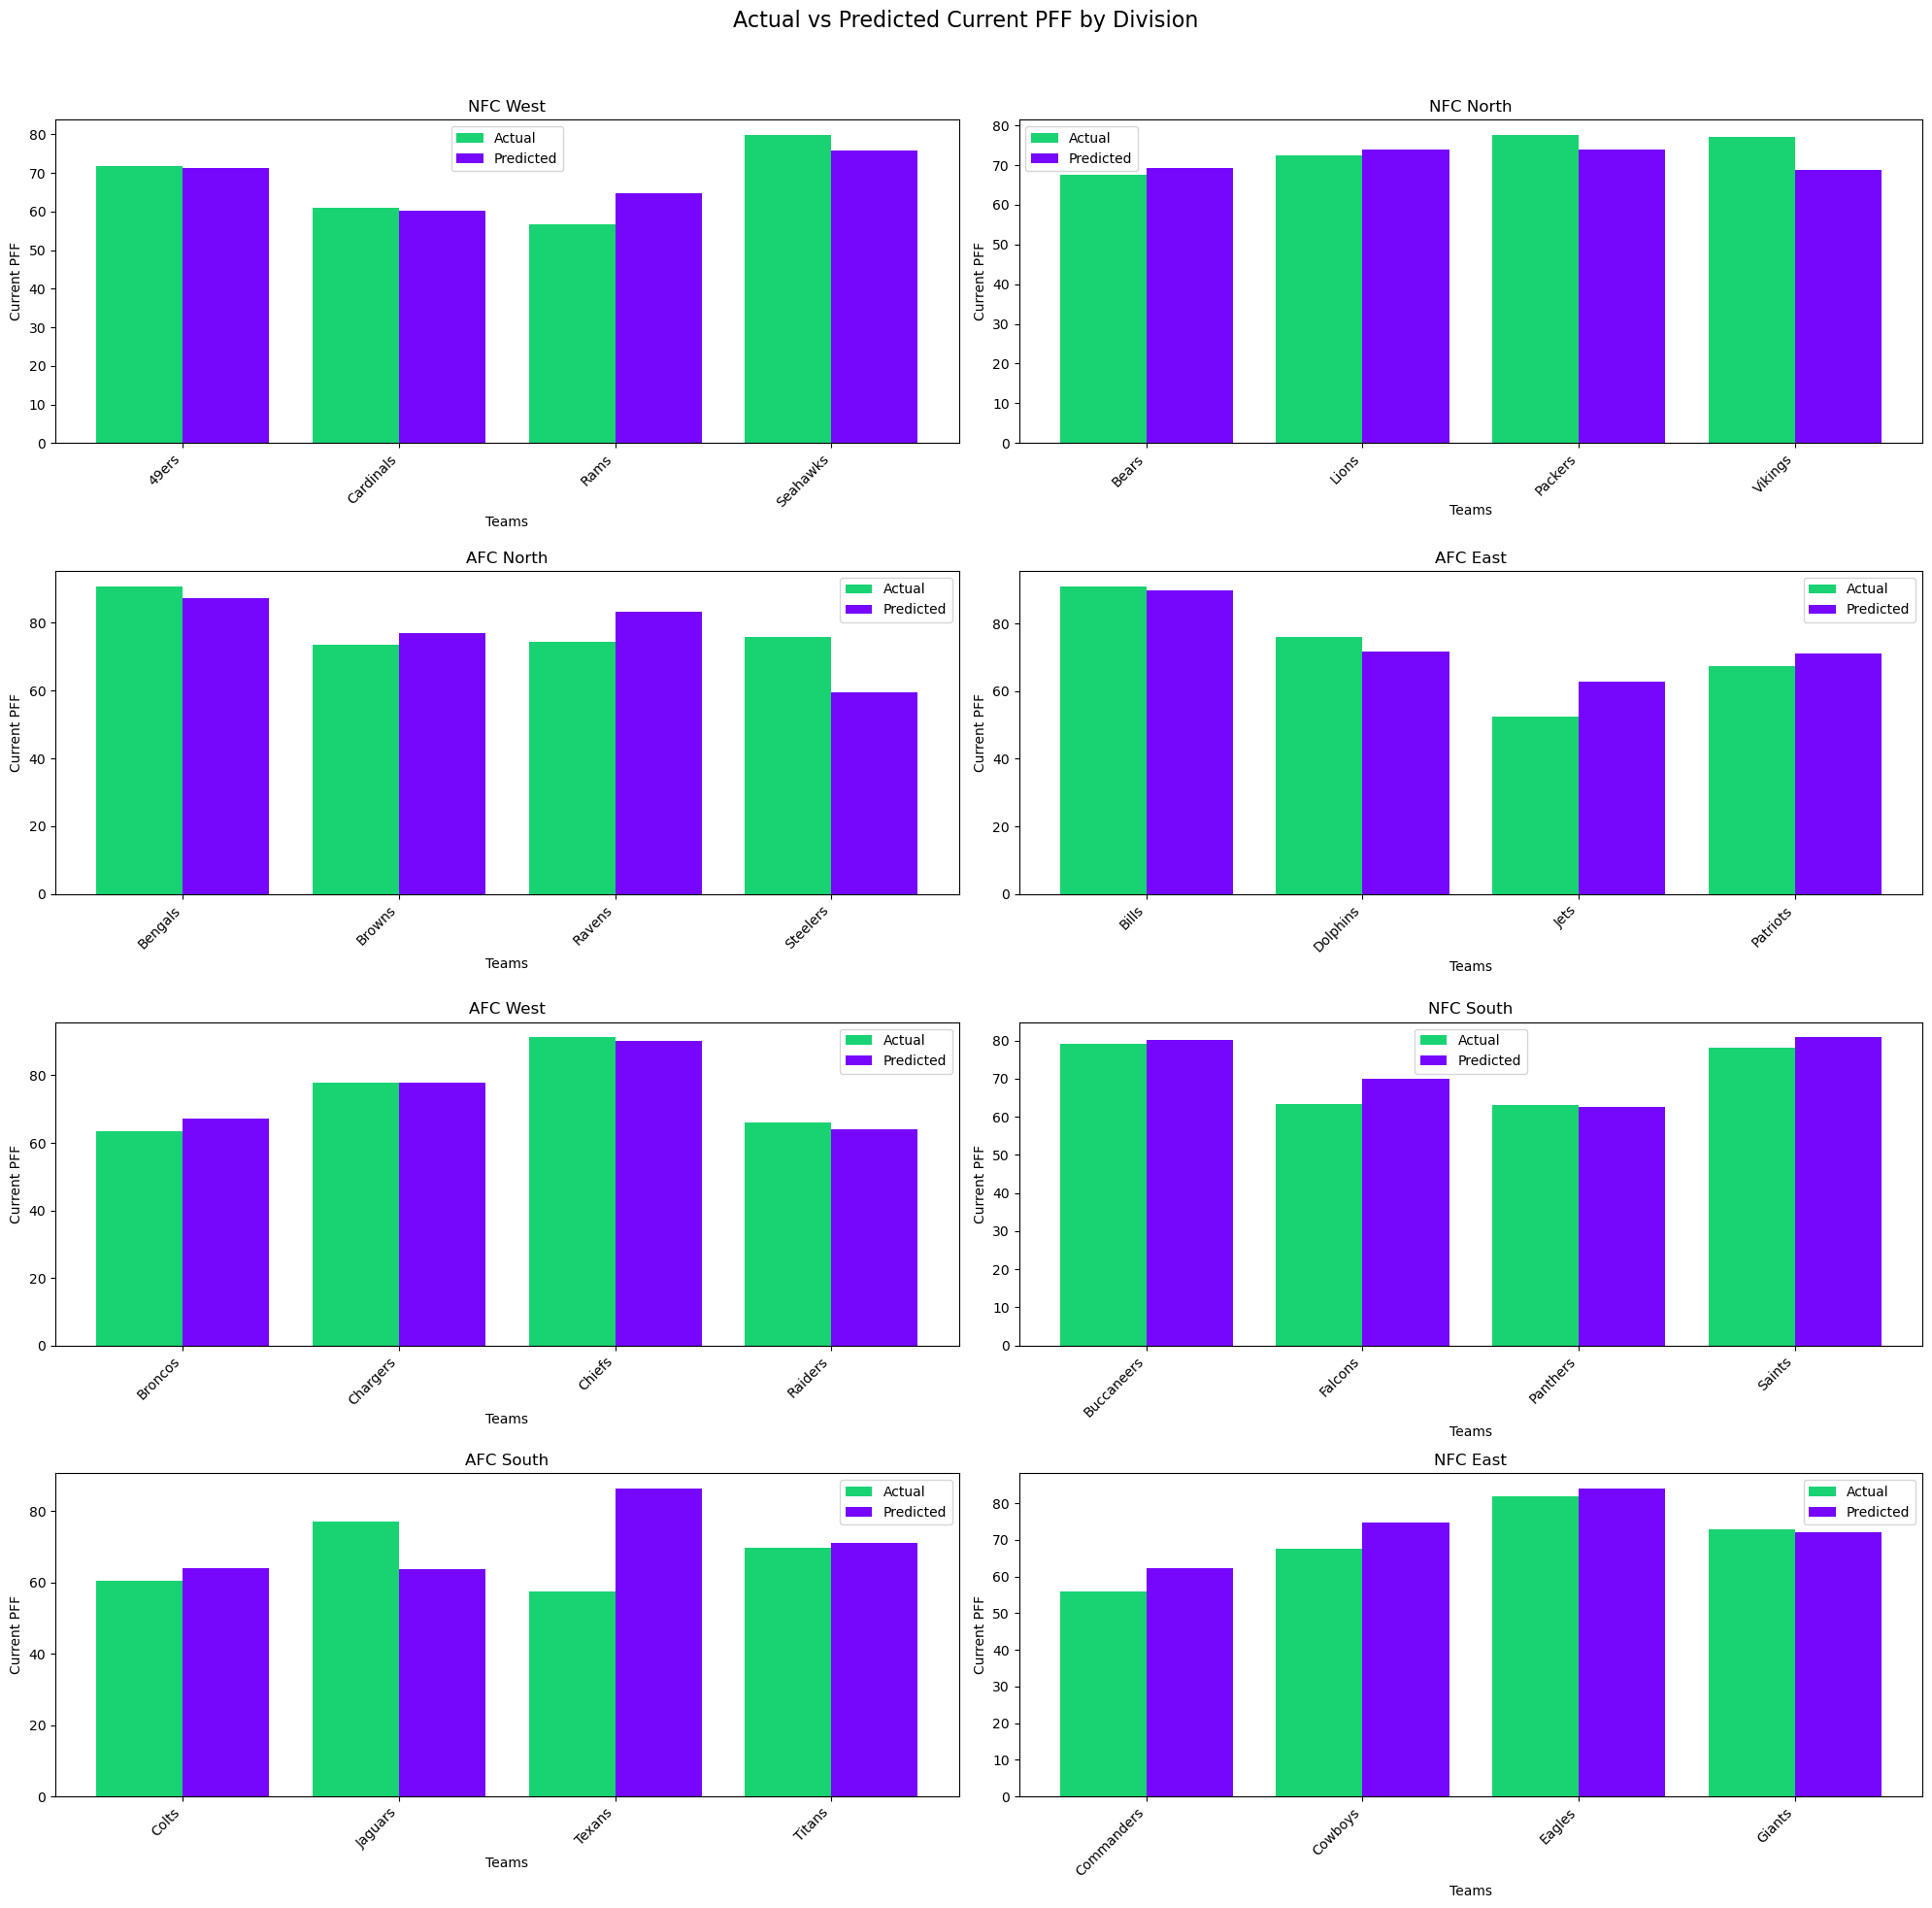

Best 0.4039283094605852
Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 65.6816 - val_loss: 200.0741
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110.9353 - val_loss: 216.9846
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29.1762 - val_loss: 244.3093
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.9859 - val_loss: 222.0218
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.0599 - val_loss: 242.5067
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.8480 - val_loss: 242.5030
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 207.6136 - val_loss: 174.3487
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.3085 - val_loss: 193.3921
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.5546 - val_loss: 219.7060
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157.8993 - val_loss: 170.3851
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.7657 - val_loss: 170.2031
Epoch 12/750
4/4 ━━━

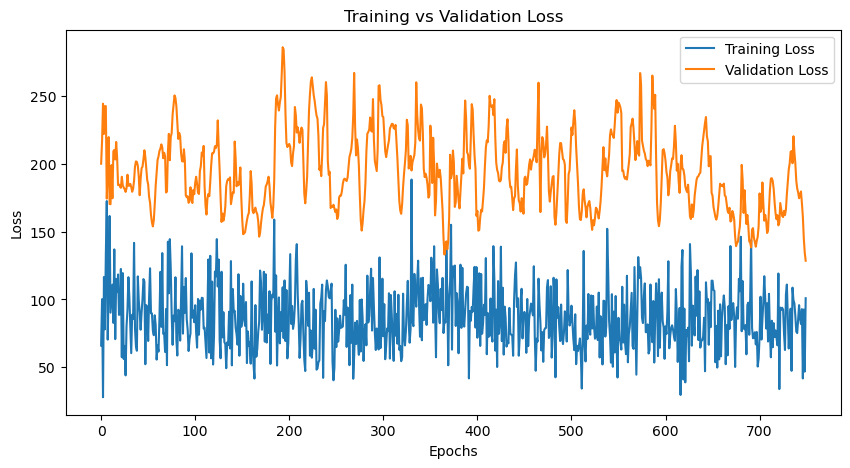

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


R² Score: 0.5142
Saved new best model with R² = 0.5142


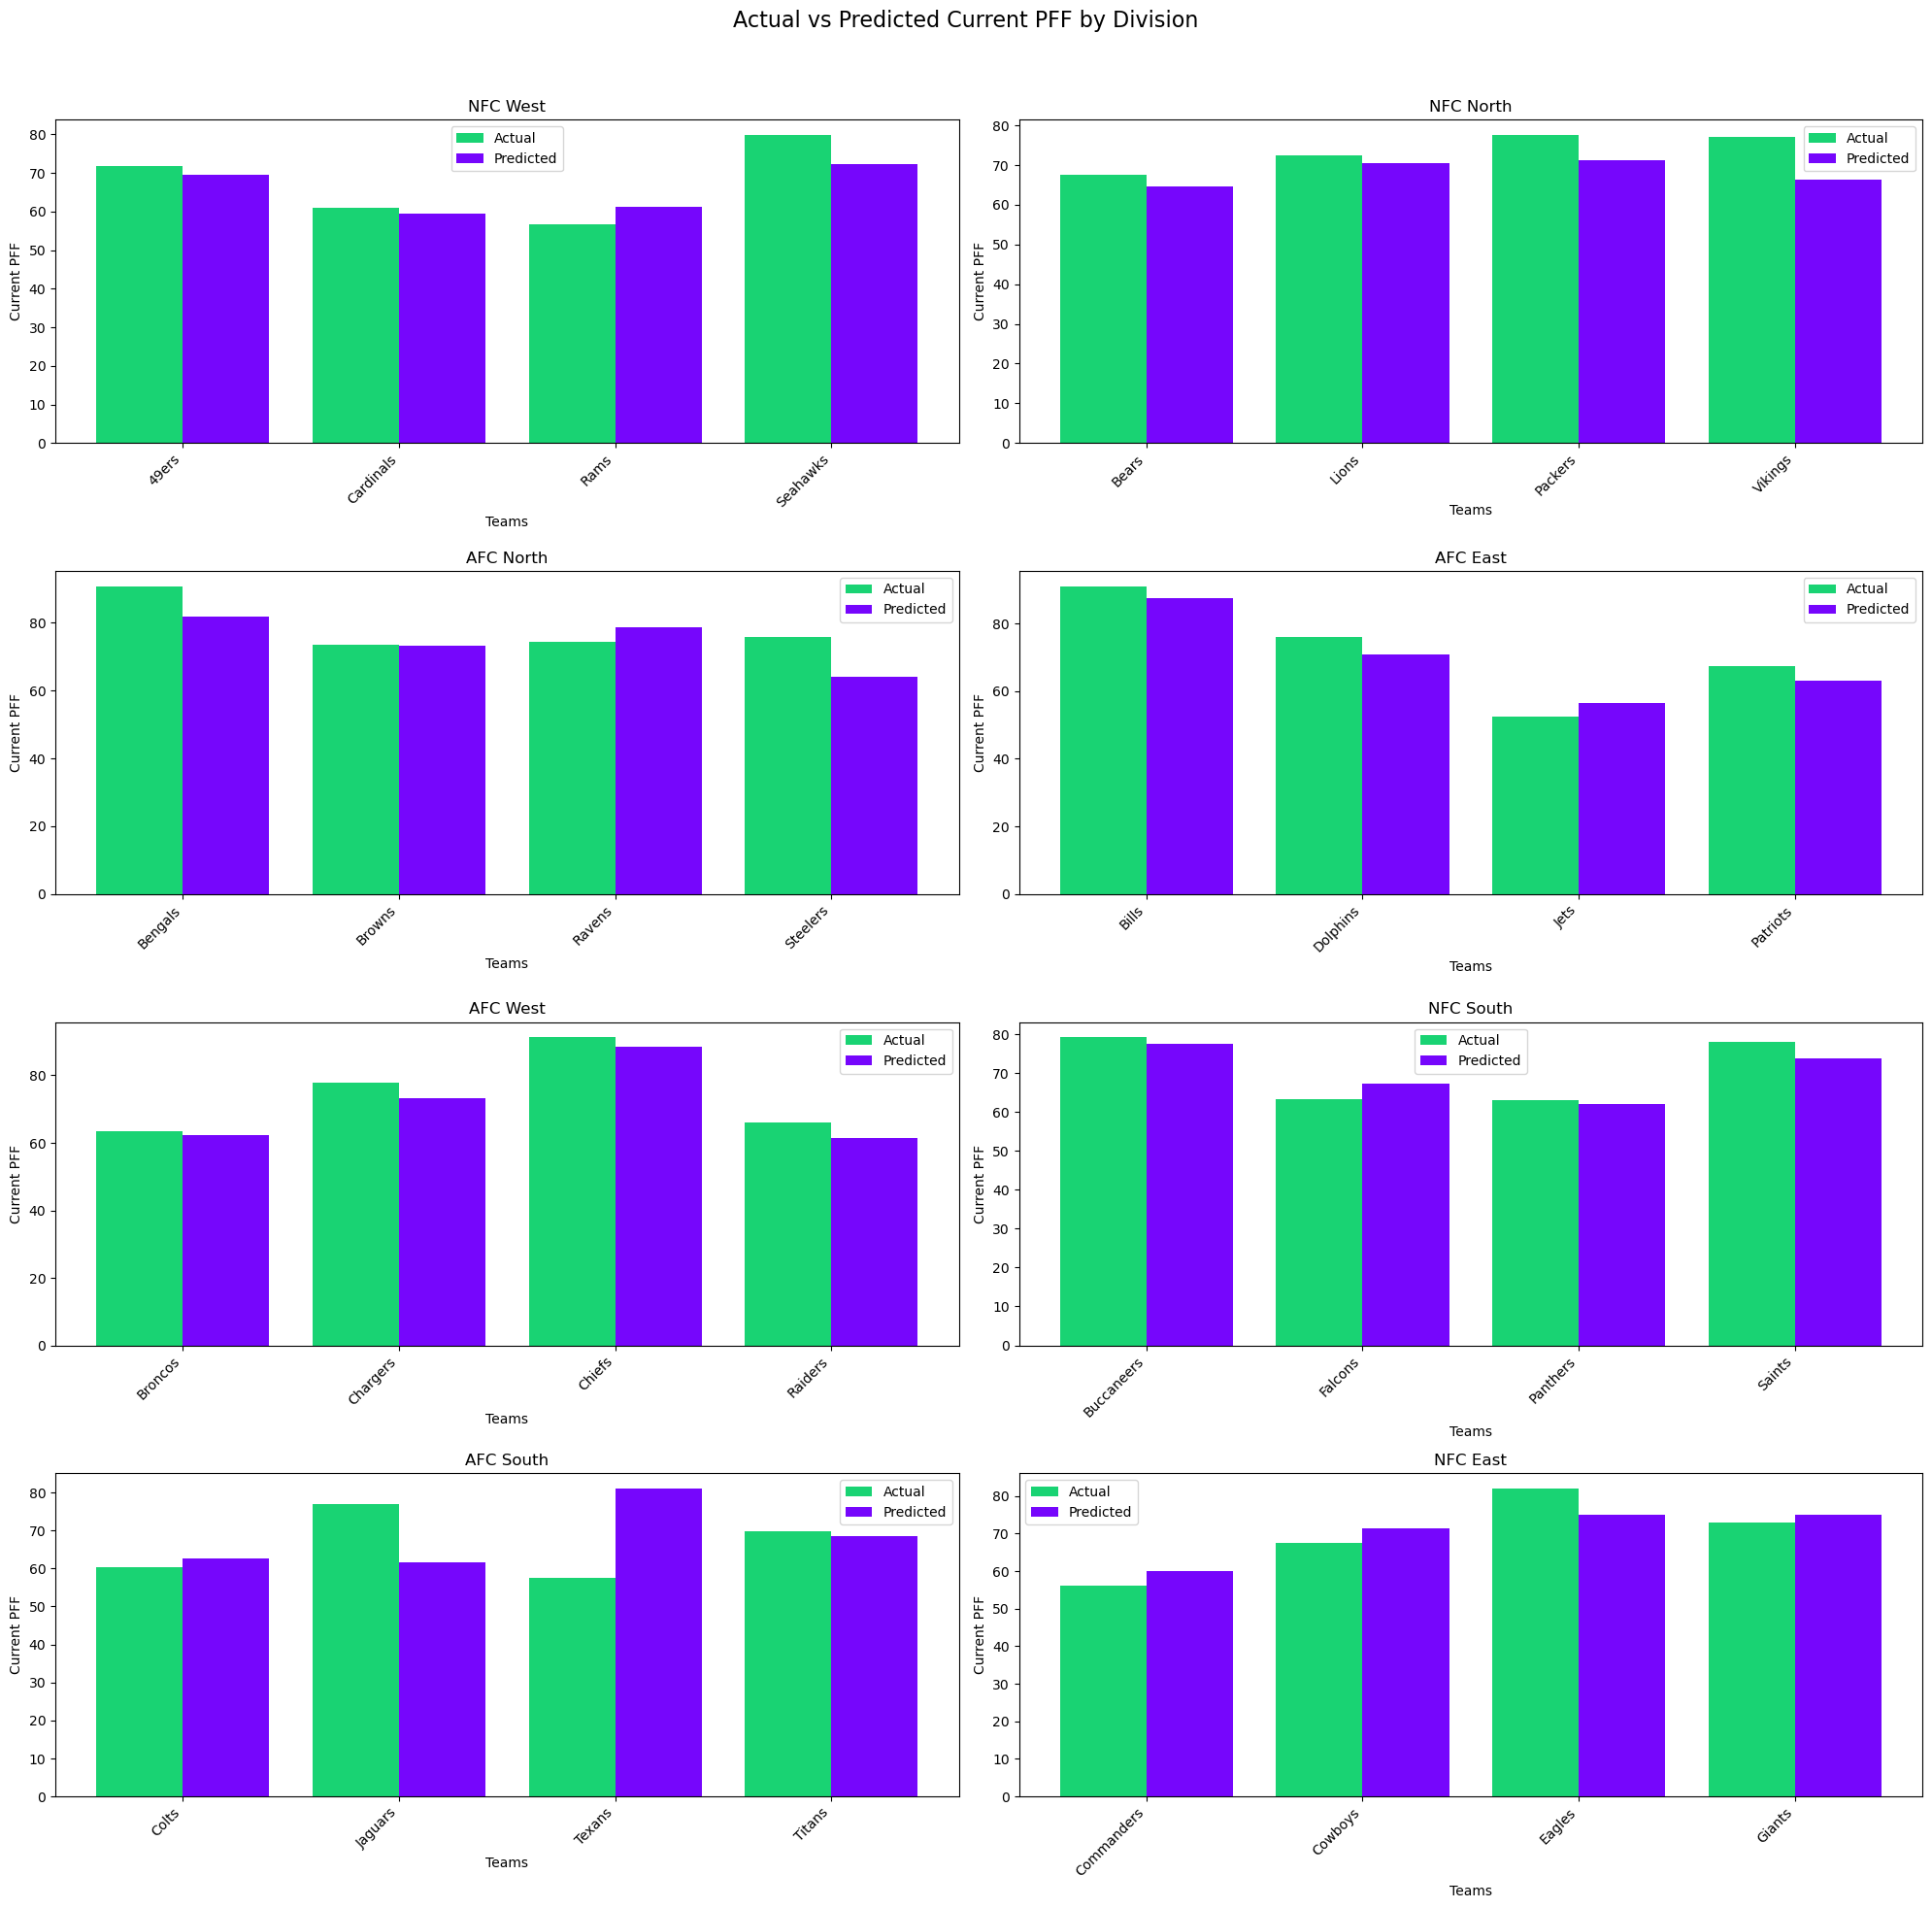

Best 0.514209951527737


In [205]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [80, 100, 150, 200, 250, 500, 750]
best_r2 = -np.infty
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        model.save("best_model.h5")
        print(f"Saved new best model with R² = {best_r2:.4f}")

    # Plot actual vs predicted values
    data = df[df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
    print("Best " + str(best_r2))
    
